# Try reading HDSD dataset as Dask array

In [1]:
%matplotlib inline
import h5pyd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from random import randint


## Read without Dask

In [2]:
# Open the wind data "file"
# server endpoint, username, password is found via a config file
f = h5pyd.File("/nrel/wind-us.h5", 'r')  

In [3]:
f.attrs['history']   # attributes can be used to provide desriptions of the content

'Produced by 3TIER, Inc. under NREL subcontract AGV-2-22460-01'

In [4]:
list(f)  # list the datasets in the file

['DIF',
 'DNI',
 'GHI',
 'coordinates',
 'datetime',
 'inversemoninobukhovlength_2m',
 'precipitationrate_0m',
 'pressure_0m',
 'pressure_100m',
 'pressure_200m',
 'relativehumidity_2m',
 'status',
 'temperature_100m',
 'temperature_10m',
 'temperature_120m',
 'temperature_140m',
 'temperature_160m',
 'temperature_200m',
 'temperature_2m',
 'temperature_40m',
 'temperature_60m',
 'temperature_80m',
 'winddirection_100m',
 'winddirection_10m',
 'winddirection_120m',
 'winddirection_140m',
 'winddirection_160m',
 'winddirection_200m',
 'winddirection_40m',
 'winddirection_60m',
 'winddirection_80m',
 'windspeed_100m',
 'windspeed_10m',
 'windspeed_120m',
 'windspeed_140m',
 'windspeed_160m',
 'windspeed_200m',
 'windspeed_40m',
 'windspeed_60m',
 'windspeed_80m']

In [5]:
dset = f['windspeed_60m']

In [6]:
dset.id.id  # if this is an int, then you are using h5py!

'd-63038e98-4c15-11e7-81a9-0242ac110008'

In [7]:
dset.shape

(8760, 1602, 2976)

In [8]:
dset.dtype

dtype('float32')

In [9]:
dset.chunks

[32, 50, 186]

In [10]:
dset.shape[0] * dset.shape[1] * dset.shape[2] * 4  # 155 GB!

167055022080

In [11]:
(dset.shape[0] * dset.shape[1] * dset.shape[2]) // (dset.chunks[0] * dset.chunks[1] * dset.chunks[2])  # lots a chunks

140335

In [12]:
dset.shape[1] * dset.shape[2] * 4  # 18 MB per slice

19070208

In [13]:
ntimes = dset.shape[0]

Read a subsampled slice at a random time step

In [14]:
tstep = randint(0, ntimes-1)  
%time data = dset[tstep,::8,::8]

CPU times: user 4 ms, sys: 8 ms, total: 12 ms
Wall time: 6.17 s


CPU times: user 96 ms, sys: 4 ms, total: 100 ms
Wall time: 95.1 ms


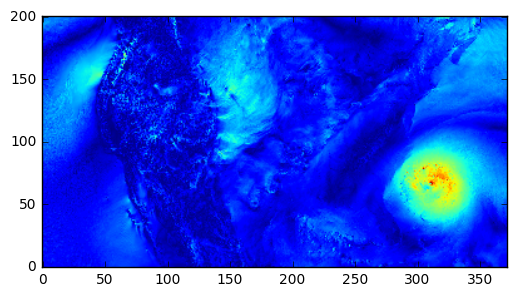

In [15]:
%time plt.imshow(data, origin="lower")

In [16]:
h5_chunks = dset.chunks

## Dask: lock=False, chunks = HDF5

In [18]:
import dask.array as da

CPU times: user 24 ms, sys: 0 ns, total: 24 ms
Wall time: 21.3 ms


CPU times: user 3.26 s, sys: 256 ms, total: 3.52 s
Wall time: 5.12 s


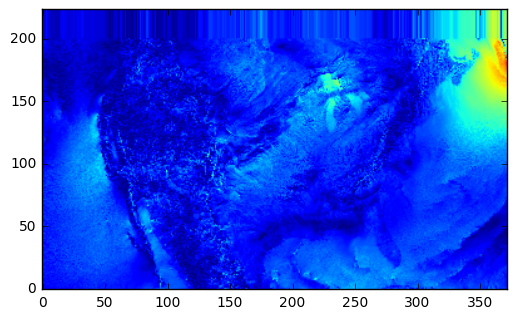

In [19]:
x = da.from_array(dset, chunks=h5_chunks, lock=False)

tstep = randint(0, ntimes-1)    #read another random time step
%time data = x[tstep,::8,::8]

%time plt.imshow(data, origin="lower")

## Dask: lock=False, chunks = 2* HDF

[64, 100, 372]
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 2.51 ms


CPU times: user 976 ms, sys: 96 ms, total: 1.07 s
Wall time: 6.1 s


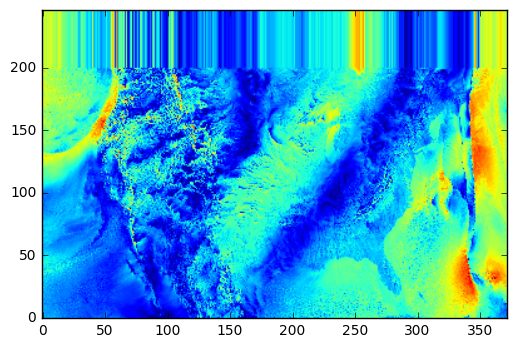

In [20]:
chunks_l = list((np.array(h5_chunks)*2).astype(int))
print(chunks_l)

x = da.from_array(dset, chunks=chunks_l, lock=False)

tstep = randint(0, ntimes-1)    #read another random time step
%time data = x[tstep,::8,::8]

%time plt.imshow(data, origin="lower")

## Dask: lock=False, chunks = 0.5* HDF

In [21]:
chunks_s = list((np.array(h5_chunks)*0.5).astype(int))
print(chunks_s)

[16, 25, 93]


CPU times: user 280 ms, sys: 0 ns, total: 280 ms
Wall time: 281 ms


ERROR:root:connection error: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',))


OSError: Connection Error

Traceback
---------
  File "/home/rsignell/miniconda3/envs/IOOS3/lib/python3.5/site-packages/dask/async.py", line 268, in execute_task
    result = _execute_task(task, data)
  File "/home/rsignell/miniconda3/envs/IOOS3/lib/python3.5/site-packages/dask/async.py", line 249, in _execute_task
    return func(*args2)
  File "/home/rsignell/miniconda3/envs/IOOS3/lib/python3.5/site-packages/dask/array/core.py", line 52, in getarray
    c = a[b]
  File "/home/rsignell/miniconda3/envs/IOOS3/lib/python3.5/site-packages/h5pyd/_hl/dataset.py", line 641, in __getitem__
    rsp = self.GET(req, format="binary")
  File "/home/rsignell/miniconda3/envs/IOOS3/lib/python3.5/site-packages/h5pyd/_hl/base.py", line 427, in GET
    rsp = self.id._http_conn.GET(req, params=params, format=format)
  File "/home/rsignell/miniconda3/envs/IOOS3/lib/python3.5/site-packages/h5pyd/_hl/httpconn.py", line 147, in GET
    raise IOError("Connection Error")


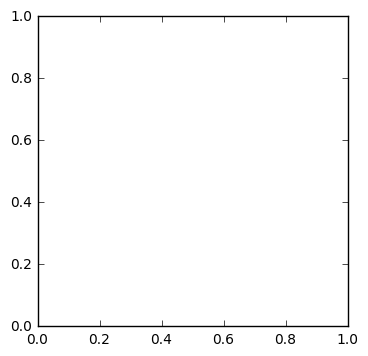

ERROR:root:connection error: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',))
ERROR:root:connection error: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',))
ERROR:root:connection error: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',))
ERROR:root:connection error: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',))
ERROR:root:connection error: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',))
ERROR:root:connection error: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',))
ERROR:root:connection error: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',))
ERROR:root:connection error: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',))
ERROR:root:conne

In [22]:
x = da.from_array(dset, chunks=chunks_s, lock=False)

tstep = randint(0, ntimes-1)    #read another random time step
%time data = x[tstep,::8,::8]

%time plt.imshow(data, origin="lower")

## Dask: lock=True, chunks = HDF

In [ ]:
x = da.from_array(dset, chunks=h5_chunks, lock=True)

tstep = randint(0, ntimes-1)    #read another random time step
%time data = x[tstep,::8,::8]

%time plt.imshow(data, origin="lower")